# Libraries 

In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.calibration import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


# read File 

In [110]:
def load_data(file_path):
    data = pd.read_csv(file_path)
    print(data.head())
    return data

# Handle Over sampling 

In [111]:
def handle_class_imbalance(data):
    # Apply oversampling or undersampling techniques
    oversampler = RandomOverSampler()
    undersampler = RandomUnderSampler()
    X = data.drop('Class', axis=1)
    y = data['Class']
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    return X_resampled, y_resampled

# Clasyfy Columns 

In [112]:
def classify_columns(data_frame):
    categorical_columns = data_frame.select_dtypes(include=['object']).columns
    numeric_columns = data_frame.select_dtypes(include=['int64', 'float64']).columns
    return list(categorical_columns), list(numeric_columns)

# Preprocessign

In [113]:

def preprocess_target_variable(data_frame, target_variable):
    encoder = LabelEncoder()
    data_frame[target_variable] = encoder.fit_transform(data_frame[target_variable])
    return data_frame

def preprocess_categorical_data(data_frame, column_name):
    if column_name != 'Class':
        imputer = SimpleImputer(strategy='most_frequent')
        transformed_values = imputer.fit_transform(data_frame[[column_name]])
        data_frame[column_name] = transformed_values[:, 0]
        encoder = OneHotEncoder(handle_unknown='ignore')
        encoded_data = encoder.fit_transform(data_frame[[column_name]])
        encoded_df = pd.DataFrame(encoded_data.toarray(), columns=[f"{column_name}_{category}" for category in encoder.categories_[0]])
        data_frame = pd.concat([data_frame, encoded_df], axis=1)
        data_frame.drop(column_name, axis=1, inplace=True)
    return data_frame

def preprocess_numeric_data(data_frame, column_name):
    if column_name != 'Class':
        imputer = SimpleImputer(strategy='median')
        data_frame[column_name] = imputer.fit_transform(data_frame[[column_name]])
        scaler = StandardScaler()
        data_frame[column_name] = scaler.fit_transform(data_frame[[column_name]])
    return data_frame

# Split data 

In [114]:
def split_data(data, target_variable):
    if target_variable not in data.columns:
        raise ValueError(f"Target variable '{target_variable}' not found in the dataset columns.")
    X = data.drop(columns=[target_variable], errors='ignore')  
    y = data[target_variable]
    return X, y

# TRain Model 

In [115]:
def train_model(X_train, y_train):
    # Train a classification algorithm (e.g., Logistic Regression or Random Forest)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    return model

# Step 6: Evaluate Model Performance
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    report = classification_report(y_test, predictions)
    return report

# Plots 

In [116]:
def plot_box_plots(X):
    plt.figure(figsize=(12, 6))  
    X.boxplot()
    plt.title('Box Plot of Features')
    plt.show()



# remove Outliers

In [117]:
def remove_outliers_iqr(data, threshold=1, max_iterations=10):
    cleaned_data = data.copy()
    for _ in range(max_iterations):
        numeric_columns = cleaned_data.select_dtypes(include=['float64', 'int64']).columns
        for column in numeric_columns:
            Q1 = cleaned_data[column].quantile(0.25)
            Q3 = cleaned_data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]
    return cleaned_data

# Feature Selection 

In [118]:
def feature_selection(dataset, target_variable, k=5):
    if target_variable not in dataset.columns:
        raise ValueError(f"Target variable '{target_variable}' not found in the dataset columns.")
    
    X = dataset.drop(target_variable, axis=1)
    y = dataset[target_variable]
    if not isinstance(y.dtype, pd.CategoricalDtype):
        y = pd.Categorical(y).codes
    k_best = SelectKBest(score_func=f_classif, k=min(k, len(X.columns)))  
    X_selected = k_best.fit_transform(X, y)
    selected_feature_indices = k_best.get_support(indices=True)
    selected_columns = X.columns[selected_feature_indices]

    selected_dataset = dataset[selected_columns]
    selected_dataset[target_variable] = dataset[target_variable]  
    
    return selected_dataset

# MAin 

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

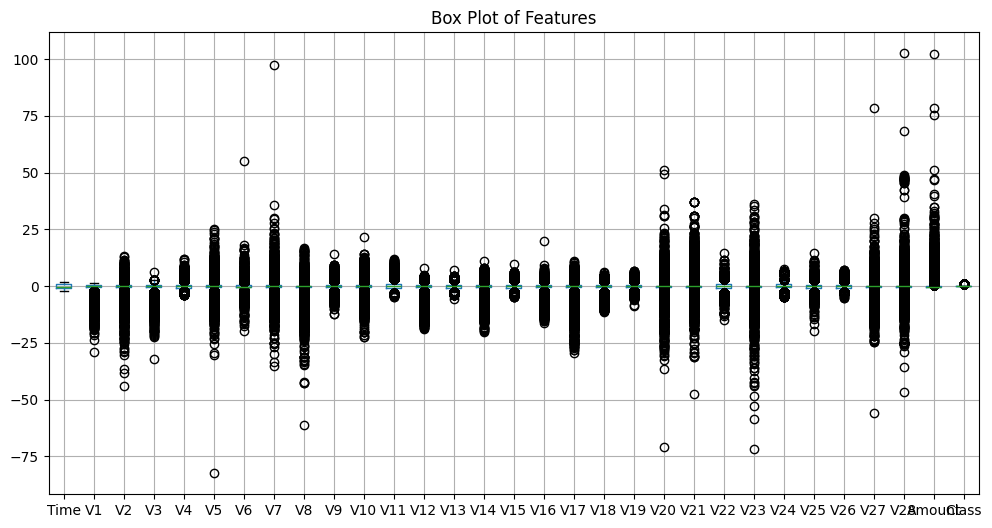



 After Removing outliers


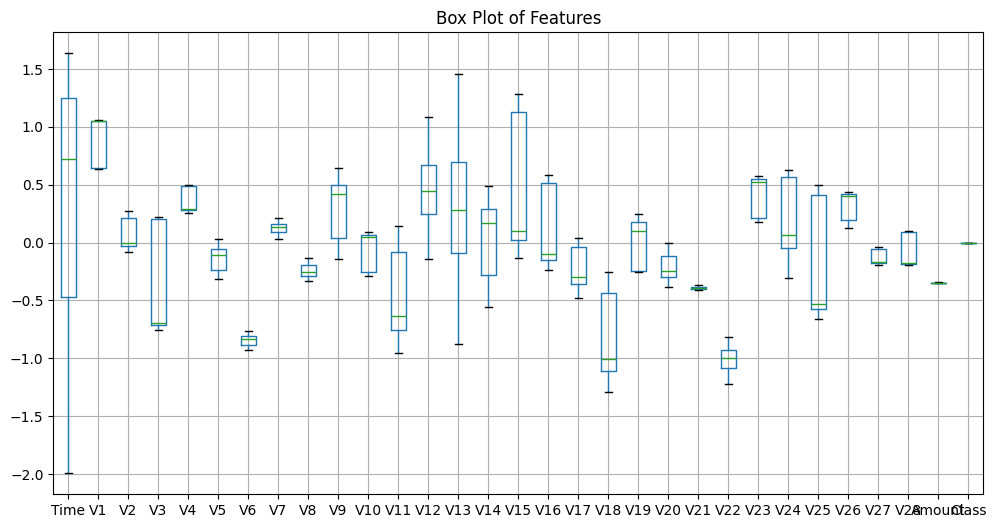

c:\Users\mahma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
C:\Users\mahma\AppData\Local\Temp\ipykernel_1124\1916238446.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_dataset[target_variable] = dataset[target_variable]


Classification Report 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266



c:\Users\mahma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


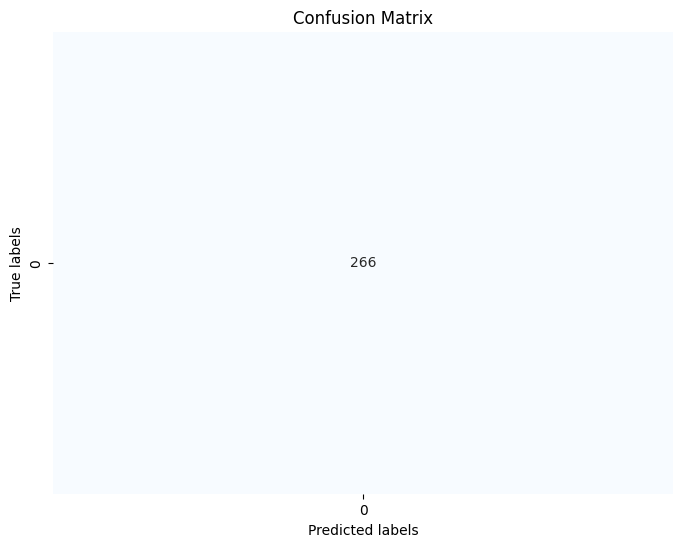

In [122]:
def main():
    file_path = "creditcard.csv"  
    data = load_data(file_path)
    data = preprocess_target_variable(data, 'Class')
    categorical_columns, numeric_columns = classify_columns(data)
    for column in categorical_columns:
        data = preprocess_categorical_data(data, column)
    for column in numeric_columns:
        data = preprocess_numeric_data(data, column)
    print("\n\n Before removing outliers")
    plot_box_plots(data)
    data = remove_outliers_iqr(data)
    print("\n\n After Removing outliers")
    plot_box_plots(data)
    selected_data = feature_selection(data, 'Class', k=5)
    X, y = split_data(selected_data, 'Class')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Classification Report \n\n")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

if __name__ == "__main__":
    main()
